In [1]:
import sqlite3
import pandas as pd

In [2]:
conn = sqlite3.connect("chinook.db")
query = """
SELECT name 
FROM sqlite_master 
WHERE type='table' AND name NOT LIKE 'sqlite_%';
"""
df = pd.read_sql_query(query, conn)
print(df)


              name
0           albums
1          artists
2        customers
3        employees
4           genres
5         invoices
6    invoice_items
7      media_types
8        playlists
9   playlist_track
10          tracks


In [3]:
df_tracks = pd.read_sql_query("SELECT * FROM tracks LIMIT 10;", conn)
df_tracks

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
5,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99
6,7,Let's Get It Up,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99
7,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99
8,9,Snowballed,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99
9,10,Evil Walks,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99


In [4]:
df_albums = pd.read_sql_query("SELECT * FROM albums LIMIT 10;", conn)
df_albums

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
5,6,Jagged Little Pill,4
6,7,Facelift,5
7,8,Warner 25 Anos,6
8,9,Plays Metallica By Four Cellos,7
9,10,Audioslave,8


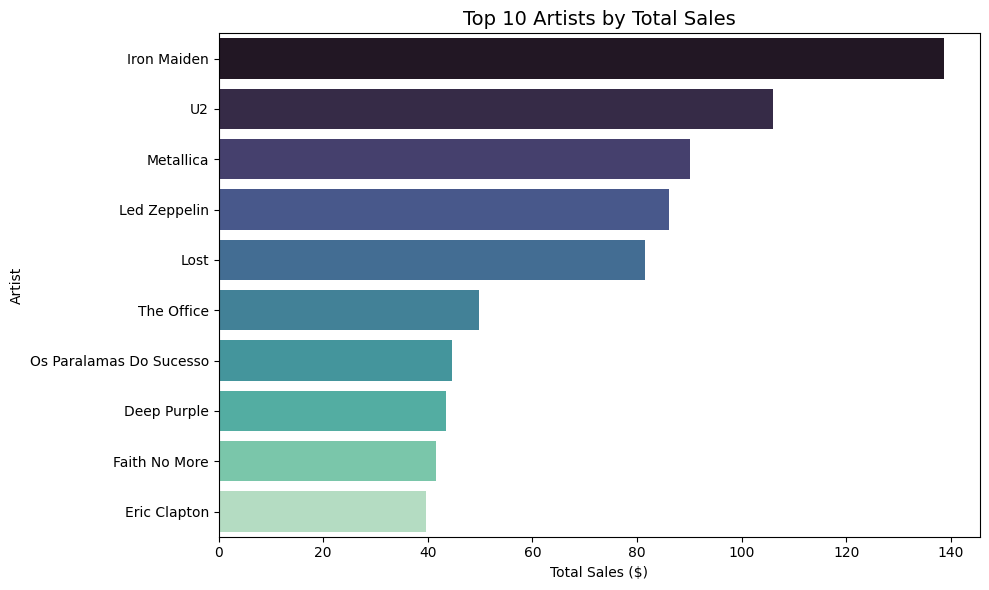

In [8]:
"""
Visualize top 10 artists by total sales from the Chinook sample database.
"""

import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
conn = sqlite3.connect("chinook.db")

# query
query = """
SELECT a.Name AS Artist, ROUND(SUM(ii.UnitPrice * ii.Quantity), 2) AS TotalSales
FROM invoice_items ii
JOIN tracks t ON ii.TrackId = t.TrackId
JOIN albums al ON t.AlbumId = al.AlbumId
JOIN artists a ON al.ArtistId = a.ArtistId
GROUP BY a.Name
ORDER BY TotalSales DESC
LIMIT 10;
"""

# Read query results into a DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# Display data
# print("Top 10 Artists by Total Sales:")
# print(df)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x="TotalSales", y="Artist", hue="Artist", data=df, palette="mako", legend=False)
plt.title("Top 10 Artists by Total Sales", fontsize=14)
plt.xlabel("Total Sales ($)")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()